## Binary Logistic Regression - Cancer OR Not 
For logistics regression to work, we need the output prediction to be binary (0 or 1), this can be achieved by using a special type of activation function called sigmoid. It looks like following :

![alt text](https://www.oreilly.com/library/view/artificial-intelligence-for/9781788472173/assets/256c02ea-ce48-445c-9346-c9863f8a4f8a.png)

The loss is calculated using sigmoid cross entropy is also called binary cross entropy. 


In [82]:
from __future__ import print_function
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

seed = 2277
torch.manual_seed(seed)

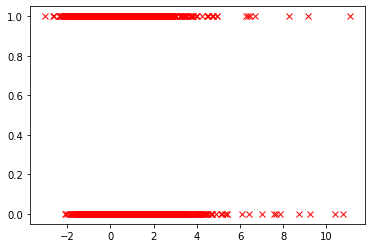

In [83]:
# Sklearn Breast cancer, dataset.

cancer = datasets.load_breast_cancer()
X, Y = cancer.data, cancer.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=999)

# Z-Score : Normalize and standardized data (z = (x - u) / s)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
plt.plot(X_train, Y_train, 'rx')

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
Y_train = torch.from_numpy(Y_train.astype(np.float32))
Y_test = torch.from_numpy(Y_test.astype(np.float32))

Y_train = Y_train.view(Y_train.shape[0], 1)
Y_test = Y_test.view(Y_test.shape[0], 1)

In [0]:
num_samples, num_features = X_train.shape

# Cancer Model with sigmod activation function (for binary classification)
# We are overridding the forward method in this inherited class. 
class CancerModel(nn.Module):
    def __init__(self, num_features):
        super(CancerModel, self).__init__()
        self.linear = nn.Linear(num_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = CancerModel(num_features)


In [85]:

lr = 0.01
loss = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Training loop
epochs = 50
for epoch in range(epochs):
    
    # forward pass
    Y_pred = model(X_train)

    # loss
    l = loss(Y_pred, Y_train)
    
    # Backward pass and update
    l.backward()
    
    # nudge weights, causes optimizer to take a step based on the gradients of the parameters.
    optimizer.step()

    # clears old gradients from the last step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        #[w, b] = model.parameters() # unpack parameters
        print('epoch {}: loss = {}'.format((epoch+1), l.item()))

with torch.no_grad():
    Y_predicted = model(X_test)
    Y_predicted_cls = Y_predicted.round()
    accuracy = Y_predicted_cls.eq(Y_test).sum() / float(Y_test.shape[0])
    print('Accuracy : {:.3f}'.format(accuracy.item()))
    print('Confusion Matrix : \n{}'.format(confusion_matrix(Y_test, Y_predicted_cls)))


epoch 10: loss = 0.37365853786468506
epoch 20: loss = 0.2319076806306839
epoch 30: loss = 0.17477300763130188
epoch 40: loss = 0.1458970010280609
epoch 50: loss = 0.12855716049671173
Accuracy : 0.986
Confusion Matrix : 
[[61  2]
 [ 0 80]]
